In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from sklearn.metrics.pairwise import cosine_similarity
exec(open('../functions.py').read())

In [26]:
def get_cosine_similarities(sentences):	
    vec = TfidfVectorizer()

    X = vec.fit_transform(sentences)
    return cosine_similarity(X)


In [27]:
def get_cosine_similarity(sentence1,sentence2,sentences,cosine_matrix):
    s1i = sentences.index(sentence1)
    s2i = sentences.index(sentence2)
    return cosine_matrix[s1i][s2i]

In [62]:
source_path = '../TeMario/source/'
source_texts = os.listdir(source_path)

In [63]:
with open(source_path + source_texts[0],'r',encoding='latin-1') as file:
    text = file.read()

In [64]:
sentences = text_to_sentences(text)

In [28]:
cos = get_cosine_similarities(sentences)

In [30]:
print(get_cosine_similarity('massacre no líbano.','massacre no líbano.',sentences,cos))

1.0


In [65]:
print(sentences)

['Massacre no Líbano.', 'Apanhado na dinâmica do olho por olho, dente por dente, Israel erra o alvo e mata 100 libaneses num campo de refugiados.', 'BEIRUTE - O confronto entre Israel e a guerrilha fundamentalista do Hisbolá (Partido de Deus) completou ontem oito dias de forma sangrenta.', 'Bombardeios da artilharia israelense contra o Sul do Líbano provocaram dois massacres: o primeiro, em Nabatié, matou 10 pessoas, entre elas um bebê de três dias.', 'O segundo, horas depois, atingiu uma base das Nações Unidas transformada em acampamento em Caná, nos arredores de Tiro, matando pelo menos 100 pessoas e ferindo mais de 190, quase todos civis, a maioria mulheres e crianças, que se haviam refugiado no local para escapar dos bombardeios israelenses.', 'O bombardeio israelense aconteceu em resposta a um ataque com foguetes Katyusha, lançados pelo Hisbolá de uma posição a 300 metros da base.', 'A rota dos foguetes foi refeita por radares israelenses, e 15 minutos depois Israel bombardeou em 

In [68]:
import numpy as np

In [36]:
for i in np.arange(0.0, 1.0, 0.1):print(i)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [18]:
y = [0.76, 0.14666666666666667, 0.2333333333333333, 0.3, 0.3333333333333333, 0.8, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]


In [41]:
x = np.arange(0.0, 1.05, 0.05)
xticks = np.arange(0.0, 1.05, 0.1)

In [25]:
import matplotlib.pyplot as plt
import matplotlib.figure

In [42]:
plt.plot(x,y)
plt.xticks(xticks)
plt.grid(True)


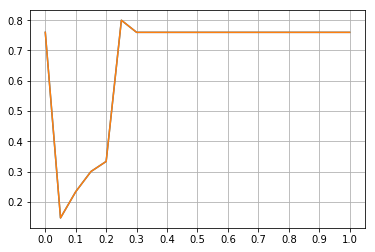

In [43]:
plt.show()

In [12]:
print(x)

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95]


In [46]:
a = [ 0.00483871 , 0.0322581 ,  0.00483871 , 0.00483871  ,0.00483871,  0.00483871,
  0.00483871 , 0.00483871 , 0.00483871 , 0.03225809 , 0.00483871 , 0.00483871,
  0.00483871 , 0.00483871 , 0.00483871  ,0.00483871 , 0.00483871 , 0.00483871,
  0.00483871 , 0.00483871 , 0.00483871 , 0.00483871,  0.00483871,  0.00483871,
  0.00483871 , 0.00483871 , 0.00483871  ,0.00483871,  0.00483871 , 0.00483871,
  0.00483871]


In [51]:
np.flip(np.argsort(a),0)

array([ 1,  9, 30, 14,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 15, 29,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,  0])

In [53]:
sorted(range(len(a)), key=lambda i: a[i])[-5:]

[28, 29, 30, 9, 1]

In [54]:
sorted(range(len(a)), key=lambda i: a[i], reverse=True)[:5]

[1, 9, 0, 2, 3]

In [89]:
def uniform_prior(sent_index,graph,sentences):
    return 1/len(sentences)

#receives graph matrix for convenience...
def degree_centrality(sent_index,graph,sentences):
	links = graph[sent_index]
	nonzero = np.nonzero(links)[0]
	return len(nonzero)/len(links)

In [57]:
def build_graph_matrix(sentences,weight_func,t):
    if not callable(weight_func):
        return 'Not functions!'
    nsents = len(sentences)
    weights = np.zeros([nsents,nsents])
    
    cos_matrix = get_cosine_similarities_matrix(sentences)
    #create weights
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            weights[i][j] = weight_func(i,j,sentences,cos_matrix,t)
    return weights

#sentences is a list, returns cossim matrix
def get_cosine_similarities_matrix(sentences):	
	vec = TfidfVectorizer()

	X = vec.fit_transform(sentences)
	return cosine_similarity(X)

#receives cossim matrix for performance reasons
#receives indexes for performance reasons aswell...
def cos_sim(sent1_index,sent2_index,cosine_matrix):
    return cosine_matrix[sent1_index][sent2_index]

def is_edge(sent1_index,sent2_index,cosine_matrix,t):
	return (cos_sim(sent1_index,sent2_index,cosine_matrix) >= t) and (sent1_index != sent2_index)

def uniform_weight(sent1_index,sent2_index,sentences,cosine_matrix,t):
	if is_edge(sent1_index,sent2_index,cosine_matrix,t):
		return 1
	else:
		return 0

In [92]:
graph = build_graph_matrix(sentences,uniform_weight,0.25)
print(np.nonzero(graph))

(array([ 3,  3,  4,  5, 14, 15, 19, 20, 31, 32, 34, 38]), array([19, 20, 15, 38, 34,  4,  3,  3, 32, 31, 14,  5]))


In [90]:
print(degree_centrality(3,graph,sentences))

0.05


In [88]:
print(len(np.nonzero(graph[3])[0]))

2


In [97]:
a = np.array(['a','b'])
print(np.where(a=='a')[0][0])

0
